# Analysis of Blue Badge Data in Leicester

This notebook explores the Blue Badge analysis data provided by Leicester City Council. The Blue Badge scheme provides parking concessions for people with disabilities. This analysis aims to examine the data related to the issuance of these badges, including the dates of issue, types of badges, and criteria for eligibility.

First off, we'll import the necessary Python libraries to handle our data. We'll need `urllib.request` to fetch the data from the web and `pandas` to work with the data in a structured format, known as a DataFrame.

In [1]:
#install urllib.request
import urllib.request

#install pandas
import pandas as pd

Now, we'll specify the URL where the Blue Badge analysis CSV file is located.

In [2]:
#get CSV file from API URL
url = "https://data.leicester.gov.uk/api/explore/v2.1/catalog/datasets/blue-badge-analysis/exports/csv?accessType=DOWNLOAD"

Next, we'll download the CSV file from the provided URL and save it to our local environment with the name `blue-badge-analysis.csv`.

In [3]:
#install CSV file to files
urllib.request.urlretrieve(url, "blue-badge-analysis.csv")

('blue-badge-analysis.csv', <http.client.HTTPMessage at 0x7c5fabe81750>)

With the file downloaded, we'll load the data into a pandas DataFrame. We need to specify the encoding as `latin-1` and the delimiter as a semicolon (`;`) to ensure the data is read correctly. We'll also display the first few rows to get a peek at the data.

In [4]:
#read csv into dataframe
badge = pd.read_csv("blue-badge-analysis.csv", encoding="latin-1", sep=';')
badge.head(10)

,ï»¿date_from,date_to,type,criteria,total
0,2018-01-01,2018-12-31,Individual Badges Issued To Renewal Applicants...,Child under 3,0
1,2018-01-01,2018-12-31,Individual Badges Issued To Renewal Applicants...,Moving Around PIP,644
2,2019-01-01,2019-12-31,Individual Badges Issued By Eligibility Category,Walking Disability,2797
3,2021-01-01,2021-06-30,Individual Badges Issued By Eligibility Category,Severe sight impairment (blind),99
4,2021-01-01,2021-06-30,Individual Badges Issued To New Applicants By ...,Hidden disability,55
5,2020-01-01,2020-12-31,Individual Badges Issued By Eligibility Category,Moving Around PIP,1578
6,2020-01-01,2020-12-31,Individual Badges Issued By Eligibility Category,Severe sight impairment (blind),155
7,2020-01-01,2020-12-31,Individual Badges Issued To New Applicants By ...,War Pensioner's Mobility Supplement,1
8,2020-01-01,2020-12-31,Individual Badges Issued To Renewal Applicants...,Higher Rate Mobility Component of DLA,469
9,2020-01-01,2020-12-31,Individual Badges Issued To Renewal Applicants...,Moving Around PIP,1232


The column name `ï»¿date_from` contains a hidden character (a Byte Order Mark or BOM). We'll rename this column to a standard lowercase `date_from` for easier handling.

In [5]:
#rename column
badge = badge.rename(columns={'ï»¿date_from': 'date_from'})
display(badge.head())

,date_from,date_to,type,criteria,total
0,2018-01-01,2018-12-31,Individual Badges Issued To Renewal Applicants...,Child under 3,0
1,2018-01-01,2018-12-31,Individual Badges Issued To Renewal Applicants...,Moving Around PIP,644
2,2019-01-01,2019-12-31,Individual Badges Issued By Eligibility Category,Walking Disability,2797
3,2021-01-01,2021-06-30,Individual Badges Issued By Eligibility Category,Severe sight impairment (blind),99
4,2021-01-01,2021-06-30,Individual Badges Issued To New Applicants By ...,Hidden disability,55


To enable date-based analysis, we'll convert the `date_from` and `date_to` columns to datetime objects. We'll use the specified format `'%Y-%m-%d'` for parsing and `errors='coerce'` to turn any unparseable dates into `NaT` (Not a Time).

In [6]:
# change data types to datetime objects
badge['date_from'] = pd.to_datetime(badge['date_from'], format='%Y-%m-%d', errors='coerce')
badge['date_to'] = pd.to_datetime(badge['date_to'], format='%Y-%m-%d', errors='coerce')
display(badge.head())

,date_from,date_to,type,criteria,total
0,2018-01-01,2018-12-31,Individual Badges Issued To Renewal Applicants...,Child under 3,0
1,2018-01-01,2018-12-31,Individual Badges Issued To Renewal Applicants...,Moving Around PIP,644
2,2019-01-01,2019-12-31,Individual Badges Issued By Eligibility Category,Walking Disability,2797
3,2021-01-01,2021-06-30,Individual Badges Issued By Eligibility Category,Severe sight impairment (blind),99
4,2021-01-01,2021-06-30,Individual Badges Issued To New Applicants By ...,Hidden disability,55


Here we'll visualise the counts of each 'type' of blue badge in the dataset using a horizontal bar plot.

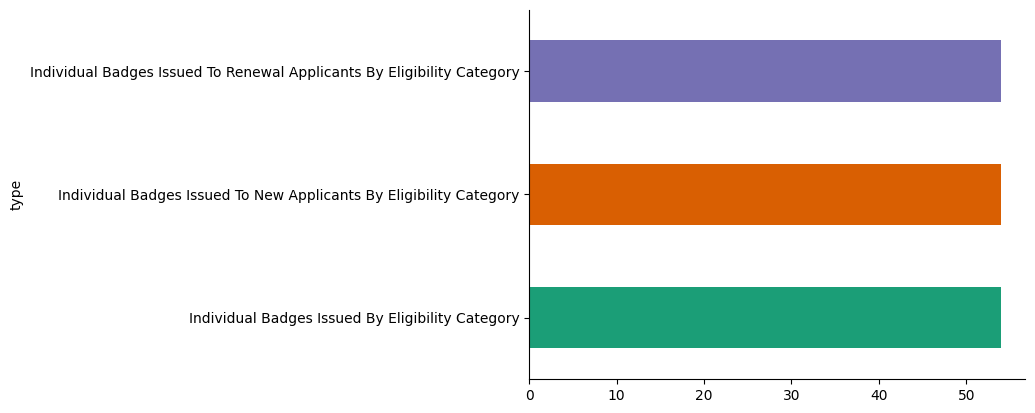

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
badge.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Finally, we visualise the counts for each 'criteria' for blue badge eligibility.

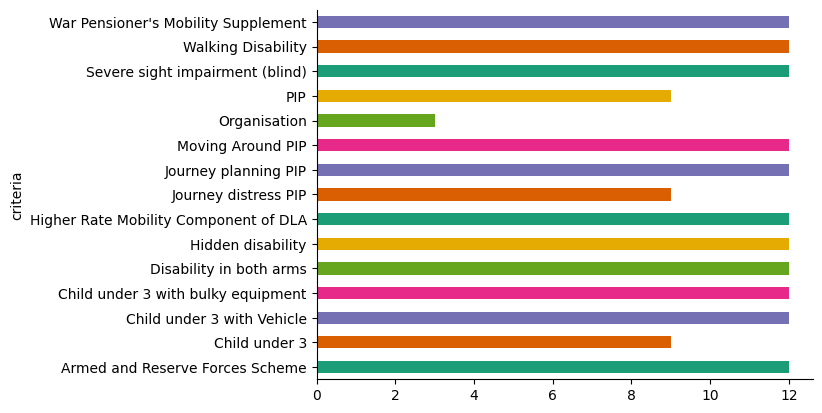

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
badge.groupby('criteria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Conclusion

In this notebook, we have successfully loaded and explored the Blue Badge analysis data for Leicester City Council. We've cleaned the data by renaming columns and converting date fields to the correct format. We've also performed some initial visualisations to understand the distribution of badge types and eligibility criteria. This analysis provides insights into the blue badge scheme in Leicester, highlighting the types of badges issued and the criteria under which they are granted.